In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
immigrant_statistics = pd.read_csv('drive/My Drive/Datasets/immigrant_statistics.csv')


In [4]:

immigrant_statistics.groupby('Year').head()


,Year,Quarter,AFN,AFS,AMN,ACS,ACE,AEA,ASO,ASE,EU1,EU2,EU8,EUO,ERO,MIE,OCE,OTH,ACE-AFG,ERO-ALB,AFN-ALG,OCE-AMS,ERO-AND,AFS-ANG,OTH-ANG,ACS-AAB,ACS-ARG,ERO-ARM,ACS-ARU,OCE-AUS,EU1-AUS,ERO-AZR,ACS-BHM,MIE-BHR,ASO-BAN,ACS-BAR,ERO-BLA,EU1-BLG,ACS-BLZ,AFS-BEN,...,ACS-SVG,OTH-STL,AFN-SUD,AFS-SDS,ACS-SRN,ERO-SJM,AFS-SWZ,EU1-SWD,ERO-SWT,MIE-SYR,AEA-TWN,ACE-TJK,AFS-TNZ,ASE-THA,AFS-TOG,OCE-TKL,OCE-TNG,ACS-TAT,AFN-TNS,ERO-TRK,ACE-TMS,OTH-TCI,OCE-TVL,AFS-UGD,ERO-UKR,MIE-UAE,AMN-UST,ACS-URG,ACE-UZB,OCE-VNT,ERO-VTC,ACS-VNZ,ASE-VTN,OTH-VIB,AMN-VIU,OCE-WAF,AFN-WSH,MIE-YMN,AFS-ZMB,AFS-ZBW
0,2007,Q1,1396,20485,1391,3337,4625,1747,13305,6026,980,447,465,225,4904,4094,1499,1005,4520,363,417,1,0,542,0,7,30,68,1,966,19,71,6,10,1069,47,66,17,3,8,...,41,30,263,0,1,0,8,37,28,119,47,2,219,288,50,0,0,173,69,1459,7,0,0,531,404,7,993,1,38,1,0,54,101,0,0,0,0,102,248,2296
1,2007,Q2,714,8163,864,1598,2041,879,7054,2171,601,353,240,74,2298,2088,974,509,2002,175,216,0,0,163,0,4,27,22,0,634,4,25,3,7,522,19,22,7,4,1,...,26,16,105,0,0,0,3,28,10,48,52,0,104,222,29,0,1,90,26,778,3,0,0,191,188,4,597,2,14,2,0,36,76,0,0,0,0,76,102,891
2,2007,Q3,739,8648,774,1800,1845,847,6838,2142,642,332,207,57,1928,2017,864,464,1796,174,235,1,0,244,0,3,26,9,0,582,8,33,2,1,617,22,25,10,6,6,...,38,26,184,0,1,0,4,21,18,55,33,1,102,249,14,0,6,111,37,654,7,0,0,212,186,2,566,4,13,0,0,33,68,0,0,0,0,69,108,1183
3,2007,Q4,745,9087,672,1680,1824,945,6096,1778,612,413,228,46,2434,2879,620,302,1760,225,238,0,0,220,0,4,21,20,0,395,9,55,2,1,582,19,33,15,2,3,...,59,34,182,0,1,0,2,21,11,62,54,2,99,279,24,0,2,80,34,859,4,0,1,229,211,4,487,2,15,0,0,21,81,0,0,0,0,74,111,1507
4,2008,Q1,1019,13398,804,2293,1874,978,8536,2079,663,327,206,95,3213,5849,708,594,1815,315,348,0,0,481,0,11,20,22,0,467,9,52,3,4,1179,25,49,5,7,3,...,42,24,199,0,0,0,2,33,9,82,42,3,132,286,30,0,0,126,43,1345,1,0,0,302,236,5,590,3,16,0,0,36,72,0,0,0,1,115,151,2230
5,2008,Q2,864,11629,937,2229,1482,1184,9358,2177,624,352,162,77,3095,3567,958,415,1417,291,250,1,0,337,0,1,42,13,0,627,10,45,8,3,1295,34,34,9,6,7,...,43,15,159,0,0,0,1,23,18,64,55,7,158,311,9,0,2,106,40,1386,5,0,0,296,189,5,689,3,20,0,0,33,110,0,0,0,0,89,150,1647
6,2008,Q3,673,9543,866,1929,1055,1363,9622,2507,525,306,148,44,2670,2469,923,303,992,248,175,0,0,279,0,3,40,15,0,584,19,32,8,2,1334,27,45,8,2,2,...,35,35,140,0,0,0,6,14,13,55,60,0,94,346,9,0,7,113,51,1243,13,0,0,220,183,2,642,2,17,0,0,38,101,0,0,0,0,86,103,1394
7,2008,Q4,979,10346,916,1852,1147,1494,10634,3175,654,503,131,54,3630,2563,968,278,1078,328,310,0,0,244,0,7,44,22,0,636,4,57,0,2,1570,20,73,8,9,5,...,26,28,221,0,0,0,7,22,9,86,59,1,112,346,20,0,3,118,53,1667,7,0,0,202,256,3,637,5,18,0,0,45,102,0,0,0,0,103,125,1491
8,2009,Q1,1193,14921,1082,2266,1285,2052,16943,4148,703,656,181,68,4516,2972,991,514,1210,407,349,0,0,370,0,5,55,33,0,618,9,42,3,11,4042,20,71,5,8,3,...,29,29,252,0,1,0,6,15,22,130,64,3,146,406,35,0,6,166,56,2243,7,0,0,327,331,0,757,0,20,1,0,49,89,0,0,0,0,185,209,2395
9,2009,Q2,1038,11070,944,1947,1073,1698,13199,3205,677,623,289,91,3206,2290,1038,565,1010,293,271,0,0,214,1,3,36,24,0,689,9,33,2,3,2319,30,94,11,9,2,...,26,49,251,0,0,0,7,29,15,109,54,0,139,432,17,0,1,138,52,1484,6,0,0,258,219,1,674,4,24,0,0,41,108,0,0,0,0,126,185,1700


      Africans
Year          
2007     49977
2008     48451
2009     52501
2010     52573
2011     54897
      Americans
Year           
2007      12116
2008      11826
2009      12067
2010      12248
2011      12397


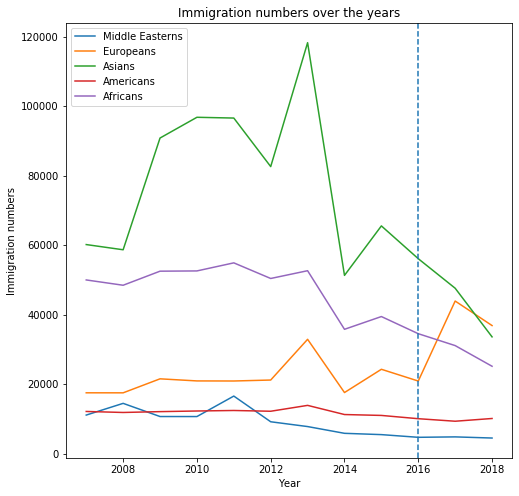

In [5]:
# Deal with Africans
africans = immigrant_statistics[['Year','AFN','AFS']]
mapping = {'AFN':'Africans','AFS':'Africans'}
africans =africans.set_index('Year').groupby(mapping, axis=1).sum()
africans.reset_index(level=0)
africans = africans.groupby('Year').sum()
print(africans.head())

# Deal with Americans
americans = immigrant_statistics[['Year','AMN','ACS']]
mapping = {'AMN':'Americans','ACS':'Americans'}
americans =americans.set_index('Year').groupby(mapping, axis=1).sum()
americans.reset_index(level=0)
americans = americans.groupby('Year').sum()
print(americans.head())

# Deal with Asians
asians = immigrant_statistics[['Year','ACE','AEA','ASO','ASE']]
mapping = {'ACE':'Asians','AEA':'Asians','ASO':'Asians','ASE':'Asians'}
asians =asians.set_index('Year').groupby(mapping, axis=1).sum()
asians.reset_index(level=0)
asians = asians.groupby('Year').sum()

# Deal with Europeans
europeans = immigrant_statistics[['Year','EU1','EU2','EU8','EUO','ERO']]
mapping = {'EU1':'Europeans','EU2':'Europeans','EU8':'Europeans','EUO':'Europeans','ERO':'Europeans'}
europeans =europeans.set_index('Year').groupby(mapping, axis=1).sum()
europeans.reset_index(level=0)
europeans = europeans.groupby('Year').sum()

#  Deal with Middle  East
middleeast = immigrant_statistics[['Year','MIE']]
middleeast = middleeast.groupby('Year').sum()


plt.figure(figsize=(8,8))
plt.plot(middleeast.index,middleeast['MIE'],label='Middle Easterns')
plt.plot(europeans.index,europeans['Europeans'],label='Europeans')
plt.plot(asians.index,asians['Asians'],label='Asians')
plt.plot(americans.index,americans['Americans'],label='Americans')
plt.plot(africans.index,africans['Africans'],label='Africans')
plt.axvline(x=2016,linestyle='dashed')
plt.xlabel('Year')
plt.ylabel('Immigration numbers')
plt.title('Immigration numbers over the years')
plt.legend()
plt.show()


Citizenship applications reflect the mood and intention of people to immigrate into the UK. High citizenship applications imply that large number of people want to immigrate into the UK.

General immigration data has decreased from 2008 to 2018. Americans and Middle Easterns immigration numbers have generally been constant, and have been relatively unaffected by Brexit (represented as a dotted line in the graph above). Asians and Africans immigration rates have decreased steadily since Brexit, but they have been decreasing since before that, so it could be linked to Theresa May's aggresive stance on immigration in 2013, during her stint as Home Office Secretary. In that regard, Brexit hasn't had much impact on Asians and Africans immigration numbers. The most curious trend was that of Europeans. Surprisingly, immigrations numbers increased since Brexit in 2016, breaking a general downward trend since 2013. This could be because of the increased uncertainty facing Europeans working and living in the UK, and the introduction of the EU Settlement Scheme, which accelerated the process for citizenship applications. This is an interesting trend and worth diving into. 

In [6]:
europeans.head()


,Europeans
Year,
2007,17486
2008,17479
2009,21510
2010,20907
2011,20886


In [20]:
immigrant_statistics.head()
immigrant_legend = pd.read_csv('drive/My Drive/Datasets/Code Legends/immigrant_legend.csv')
immigrant_legend_map = {}
for code, country in zip(immigrant_legend['Code'],immigrant_legend['Country of nationality']):
  immigrant_legend_map[code] = country
# difference in percentage between 2016 and 2018
locators = ['EU1','EU2','EU8','EUO','ERO']
refined_locators = ['Year']
for column in immigrant_statistics:
   # Select column contents by column name using [] operator
   for i in locators:
    if i in str(column):
      if str(column) != i:
        refined_locators.append(column)
#print(refined_locators)

refined_europeans = immigrant_statistics[refined_locators]
refined_locators.pop(0)
refined_locator_map = {}
for i in refined_locators:
  refined_locator_map[i] = immigrant_legend_map[i]

#print(refined_locator_map)

refined_europeans = refined_europeans.rename(refined_locator_map,axis=1)
refined_europeans = refined_europeans.groupby('Year').sum().reset_index()
refined_europeans1 = refined_europeans[(refined_europeans['Year'] == 2016)].drop('Year',axis=1).reset_index()
refined_europeans2 = refined_europeans[(refined_europeans['Year'] == 2018)].drop('Year',axis=1).reset_index()
refined_europeans_difference = refined_europeans2.subtract(refined_europeans1,axis=0).drop('index',axis=1).transpose()
refined_europeans_difference = refined_europeans_difference.rename({0:'difference'},axis=1)
refined_europeans_difference.head()

shapefile = 'drive/My Drive/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp'
#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
gdf.columns = ['country', 'country_code', 'geometry']
gdf.head()
print(gdf[gdf['country'] == 'Antarctica'])
print(gdf[gdf['country'] == 'United Kingdom'])
#Drop row corresponding to 'Antarctica'
gdf = gdf.drop(gdf.index[159])
gdf = gdf.drop(gdf.index[18])

'''
#Merge dataframes gdf and df_2016.
merged = gdf.set_index('country').join(refined_europeans_difference)
merged = merged[pd.notnull(merged['difference'])]
merged = merged[merged['difference'] > 1000]
merged.head()

# set a variable that will call whatever column we want to visualise on the map
variable = 'difference'
# set the range for the choropleth
vmin, vmax = -1000, 5000
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))

merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')
ax.set_title('Immigration Difference in Europe', fontdict={'fontsize': '25', 'fontweight' : '3'})
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
'''
gdf.head()

        country country_code                                           geometry
159  Antarctica          ATA  MULTIPOLYGON (((-48.66062 -78.04702, -48.15140...
            country  ...                                           geometry
143  United Kingdom  ...  MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54...

[1 rows x 3 columns]


,country,country_code,geometry
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,United Republic of Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Western Sahara,SAH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


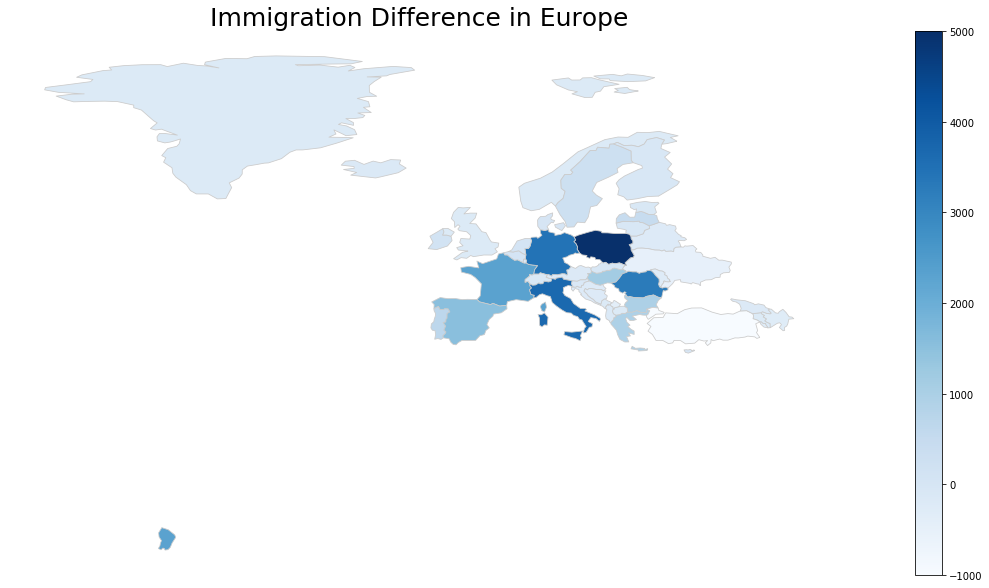

In [46]:
#Merge dataframes gdf and df_2016.
merged = gdf.set_index('country').join(refined_europeans_difference).reset_index()
a = merged[merged['country'] == 'United Kingdom']
merged.loc[142,'difference'] = 0
merged = merged[pd.notnull(merged['difference'])]
merged.head()

# set a variable that will call whatever column we want to visualise on the map
variable = 'difference'
# set the range for the choropleth
vmin, vmax = -1000, 5000
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))

merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')
ax.set_title('Immigration Difference in Europe', fontdict={'fontsize': '25', 'fontweight' : '3'})
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)


In [8]:
merged.sort_values('difference',ascending=False)

,country_code,geometry,difference
country,,,
Poland,POL,"POLYGON ((23.48413 53.91250, 23.52754 53.47012...",3165.0
Italy,ITA,"MULTIPOLYGON (((10.44270 46.89355, 11.04856 46...",2355.0
Germany,DEU,"POLYGON ((14.11969 53.75703, 14.35332 53.24817...",2217.0
Romania,ROU,"POLYGON ((28.23355 45.48828, 28.67978 45.30403...",2111.0
France,FRA,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...",1526.0
Spain,ESP,"POLYGON ((-7.45373 37.09779, -7.53711 37.42890...",1057.0
